In [2]:
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as sps

a = float(input("Введите значение параметра a, удовлетворяющее условию |a|<=2: "))
print(a)
count_it = int(input("Введите значение параметра N: "))

u = np.zeros(count_it)
y = np.zeros(count_it)
f = np.zeros(count_it)
N = 1000000000
for i in range(0, count_it):
    U = random.randint(0, N)
    F = U/N
    u[i] = U
    f[i] = F
    if F < 0.5:
        y[i] = (1/a)* math.asin(a * F - a / 2)
    else:
        y[i] = 1 - math.sqrt(2 - 2 * F)
            
order = y.argsort()
ind = order.argsort()            
data = {'Значения с. в.': pd.Series(y, index=ind),
        'Рандомное число U': pd.Series(u, index=ind),
        'U/N на [0, 1]': pd.Series(f, index=ind)}
# создаем датафрейм:
df = pd.DataFrame(data, range(0,count_it))
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)
df

Введите значение параметра a, удовлетворяющее условию |a|<=2: 1.5
1.5
Введите значение параметра N: 100


,Значения с. в.,Рандомное число U,"U/N на [0, 1]"
0,-0.549823,10421302.0,0.010421
1,-0.549313,10767762.0,0.010768
2,-0.533771,21457773.0,0.021458
3,-0.520855,30539380.0,0.030539
4,-0.487487,54809305.0,0.054809
...,...,...,...
95,0.670917,945852272.0,0.945852
96,0.682771,949682934.0,0.949683
97,0.747035,968004384.0,0.968004
98,0.757766,970661437.0,0.970661


1.5


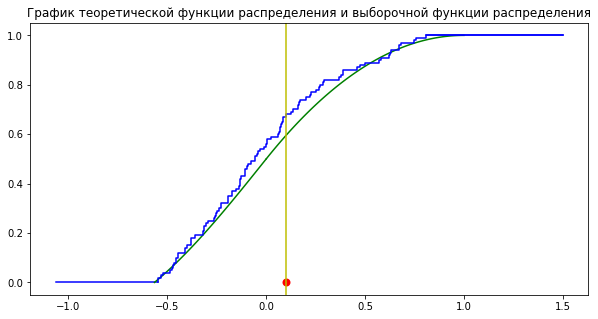

In [3]:
import matplotlib.pyplot as plt

y1 = lambda x: 0 * x1
y2 = lambda x: (1/a) * np.sin(a*x2) + 1/2
y3 = lambda x: 1/2 + x3 - x3*x3/2
y4 = lambda x: 1 + 0 * x4

f = np.sort(f)
y = np.sort(y)

x1 = np.linspace(-0.5- (1/a) * math.asin(a / 2), y[0], 100)
x2 = np.linspace(- (1/a) * math.asin(a / 2), 0, 100)
x3 = np.linspace(0, 1, 100)
x4 = np.linspace(y[count_it-1], 1.5, 100)

plt.figure(figsize=(10, 5))
plt.plot(x1, y1(x1), color ='b')
plt.plot(x2, y2(x2), color ='g')
plt.plot(x3, y3(x3), color ='g')
plt.plot(x4, y4(x4), color ='b')
ax = plt.gca()
ax.set_title('График теоретической функции распределения и выборочной функции распределения')

num = count_it
F = []
x = y
for i in range(0, num):
    res = 0
    for j in range(0, count_it):
        if y[j] < x[i]:
            res = res + 1;
    F.append(res/count_it)

F.append(1.0)
x6 = np.append(x, 1.5)  
plt.step(x6, F, color = 'b')
H = F
#мера расхождения
D = 0
res_x = res_f = 0
for i in range(0, count_it):
    if x[i] < 0:
        c = math.fabs(F[i] - (1/a) * np.sin(a*x[i]) - 1/2)
        if (i+1 < count_it):
            b = math.fabs(F[i+1] - (1/a) * np.sin(a*x[i]) - 1/2)
        if (c>b and D<c):
            D = c
            res_x = x[i]
        if (b>c and D<b):
            D = b
            res_x = x[i]
    else:
        c = math.fabs(F[i] - 1/2 - x[i] + x[i]*x[i]/2)
        if (i + 1 < count_it):
            b = math.fabs(F[i + 1] - 1/2 - x[i] + x[i]*x[i]/2)
        if (c>b and D<c):
            D = c
            res_x = x[i]
        if (b>c and D<b):
            D = b
            res_x = x[i]

plt.plot(res_x, 0, marker = '.', mew = 5, color = 'r')
plt.axvline(x=res_x, color = 'y')
plt.axvline(x=y[0], ymin = 0, ymax = H[0], color = 'b')
print(a)         
plt.show()

In [4]:
x = np.sort(y)
#мат. ожидание
E = 1/(a*a) - math.sqrt(1-(a/2)**2)/(a**2) - math.asin(a / 2)/(2*a) + 1/6
Dis = (math.asin(a / 2)**2)/(2*a**2) + math.asin(a / 2) * 2*math.sqrt(1-(a/2)**2)/(a**3) - 1/(a**2)+1/12 - E**2
#размах выборки
R = x[count_it-1]-x[0]

#выборочное средние
xx = 0
for i in range(0, count_it):
    xx = xx + x[i]
xx = (1.0/ count_it) * xx

#выборачная дисперссия
S = 0
for i in range(0, count_it):
    S = S +(x[i] - xx)**2
S = (1.0/count_it) * S

#выборочная медиана  
Me = 0
if count_it % 2 == 1:
    if (count_it == 1):
        Me = x[0]
    else:
        Me = x[int((count_it - 1)/2) + 1]
else:
    Me = (x[int(count_it/2)] +  x[int(count_it/2) + 1])/2
    

data = {'Мат. ожидание': pd.Series(E),
        'Выборочное среднее': pd.Series(xx),
        'Модуль разности мат. ожидания и выборочного среднего': pd.Series(math.fabs(E - xx)),
       'Дисперсия': pd.Series(Dis),
       'Выборочная дисперсия': pd.Series(S),
       'Модуль разности дисперсии и выборочной дисперсии': pd.Series(math.fabs(Dis-S)),
       'Выборочная медиана': pd.Series(Me),
       'Размах выборки': pd.Series(R),
       'Мера расхождения D': pd.Series(D)}

# создаем датафрейм:
df = pd.DataFrame(data, range(0,1))
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)
df

,Мат. ожидание,Выборочное среднее,Модуль разности мат. ожидания и выборочного среднего,Дисперсия,Выборочная дисперсия,Модуль разности дисперсии и выборочной дисперсии,Выборочная медиана,Размах выборки,Мера расхождения D
0,0.034451,-0.007754,0.042206,0.129935,0.122754,0.007181,-0.051257,1.359351,0.086945


### *Плотность распределения н. с. в.*

$
f_{\eta}(y) =
  \begin{cases}
    0  & \quad y \leq -\frac{1}{a}\textit{arcsin}\frac{a}{2} \\
    cos(ay)       & \quad -\frac{1}{a}\textit{arcsin}\frac{a}{2} \leq y \leq 0 \\
    -y + 1  & \quad 0 \leq y \leq 1\\
    0  & \quad  y \geq 1
  \end{cases}
$

### *Функция распределения н. с. в.*
$
F_{\eta}(y) =
  \begin{cases}
    0  & \quad y \leq -\frac{1}{a}\textit{arcsin}\frac{a}{2} \\
    \frac{1}{a}sin(ay)-\frac{1}{2}       & \quad -\frac{1}{a}\textit{arcsin}\frac{a}{2} \leq y \leq 0 \\
    -\frac{y^2}{2} + y + \frac{1}{2}  & \quad 0 \leq y \leq 1\\
    1  & \quad  y \geq 1
  \end{cases}
$


### *Обратная функция к функции распределения н. с. в.*
$
G(t) =
  \begin{cases}
    \frac{1}{a}arcsin(at + {sin}\frac{a}{2}) & \quad 0 \leq t \leq 0.5\\
    -\sqrt{2(1-t)}+1       & 0.5 \leq t \leq 1 
  \end{cases}
$

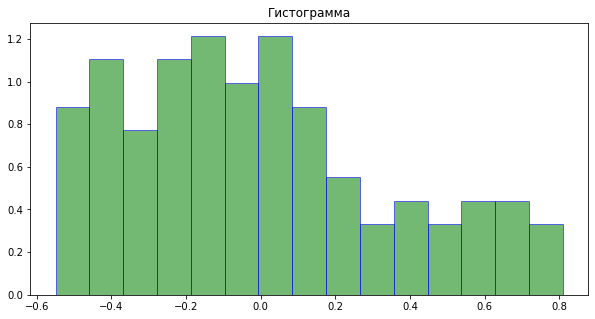

Максимальная мера расхождения гистограммы и теор. плотности распределения: 0.3578608222146333


,Значение точки - середины j-ого промежутка Zj,Значение теор. плотности распределения в точке Zj,Значение гистограмы в точке Zj
0,-0.504512,0.727059,0.882774
1,-0.413888,0.813394,1.103468
2,-0.323265,0.884723,0.772427
3,-0.232642,0.939728,1.103468
4,-0.142018,0.977395,1.213815
...,...,...,...
10,0.401722,0.598278,0.441387
11,0.492346,0.507654,0.331040
12,0.582969,0.417031,0.441387
13,0.673592,0.326408,0.441387


In [5]:
k = 15
bool = 1
#k = float(input("Введите количество промежутков k: "))
#bool = float(input("Введите 1, чтобы сгенирировать равные по величине промежутки\nВведите 2, 
#чтобы ввести свои границы промежутков: "))

if (bool == 1):
    lamd = np.linspace(start = x[0], stop = x[count_it-1], num = int(k+1))
else:
    i = k - 1
    print("Левая граница: ", x[0], "  Правая граница: ", x[count_it - 1])
    lamd = []
    lamd.append(x[0])
    while(i != 0):
        print("Введите правую границу промежутка №", int(k - i), " :")
        val = float(input())
        lamd.append(val)
        i = i-1
    lamd.append(x[count_it - 1])  
  
f_ht = []
Df = 0
n = []
Z = []
for i in range(1, int(k + 1)):

    m = (lamd[i] + lamd[i-1])/2.0
    Z.append(m)
    if (m < 0):
        f_ht.append(math.cos(a*m))
    else:
        f_ht.append(- m + 1)
        
    count_x = 0
    for j in range(0, count_it):
        if x[j] <= lamd[i] and x[j] >= lamd[i-1]:
            count_x = count_x + 1;
    n.append(count_x / (count_it * (lamd[i] - lamd[i-1])))
    
    bf = math.fabs(n[i - 1] - f_ht[i - 1])
    if (Df < bf):
        Df = bf
    
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title('Гистограмма')
plt.hist( x, bins = lamd, edgecolor = 'b', facecolor='g', density = 1, alpha=0.55) 
plt.show()
print("Максимальная мера расхождения гистограммы и теор. плотности распределения:", Df)

data = {'Значение точки - середины j-ого промежутка Zj ': pd.Series(Z),
        'Значение теор. плотности распределения в точке Zj': pd.Series(f_ht),
        'Значение гистограмы в точке Zj': pd.Series(n)}
# создаем датафрейм:
df = pd.DataFrame(data, range(0,k))
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)
df


In [6]:
from scipy.special import gamma
from scipy import integrate


def val_f(p1, p2):
    if p1 < 0:
        f_p1 = (1./a) * math.sin(a*p1) + 1/2
    else:
        f_p1 = 1/2 + p1 - p1 * p1 / 2
    if p2 < 0:
        f_p2 = (1./a) * math.sin(a*p2) + 1/2
    else:
        f_p2 = 1/2 + p2 - p2 * p2 / 2
    return f_p2 - f_p1


bool = 1
#k = int(input("Введите количество промежутков k: "))
#bool = float(input("Введите 1, чтобы сгенирировать равные по величине промежутки\nВведите 2, 
#чтобы ввести свои границы промежутков: "))
alfa = float(input("Введите уровень значимости alfa: "))
k = 5
u = 2
lamd0 = []
lamd0.append((1/a)* math.asin(- a / 2.0))
t = np.linspace(start = 0, stop = 1, num = u + 1)
for i in range(u-1):
    if t[i+1] < 0.5:
        lamd0.append((1/a)* math.asin(a * t[i+1] - a / 2.0))
    else:
        lamd0.append(1 - math.sqrt(2 - 2 * t[i+1]))

lamd0.append(1)

if (bool == 1):
    lamd = []
    lamd.append((1/a)* math.asin(- a / 2.0))
    t = np.linspace(start = 0, stop = 1, num = k + 1)
    for i in range(k-1):
        if t[i+1] < 0.5:
            lamd.append((1/a)* math.asin(a * t[i+1] - a / 2.0))
        else:
            lamd.append(1 - math.sqrt(2 - 2 * t[i+1]))

    lamd.append(1)
else:
    i = k - 1
    print("Левая граница: ", x[0], "  Правая граница: ", x[count_it - 1])
    lamd = []
    lamd.append(x[0])
    while(i != 0):
        print("Введите правую границу промежутка №", int(k - i), " :")
        val = float(input())
        lamd.append(val)
        i = i-1
    lamd.append(x[count_it - 1])
    
R0 = 0
q = []
n = []
for i in range(1, int(k + 1)):
    
    #число наблюдений попавших в промежуток
    count_x = 0
    for j in range(count_it):
        if x[j] <= lamd[i] and x[j] >= lamd[i-1]:
            count_x = count_x + 1;
    n.append(count_x)
    
    #теоритическая вероятность попадания с. в. в промежуток
    
    q.append(val_f(lamd[i-1], lamd[i]))
    
    R0 = R0 + (n[i-1]- count_it * q[i-1])**2 / count_it * q[i-1]

g = gamma((k-1)/2)
l = lambda x: (x**((k-1)/2-1)) / (2**((k-1)/ 2)*g*(math.e**(x/2)))
b = integrate.quad(l, 0, R0)
FR0 = 1.0 - b[0]
print('F(R0) c чертой: ', FR0)
if FR0 < alfa:
    print("Гипотеза H0 отклонена :()")
else:
    print("Гипотеза H0 принята :)")

data = {'Значения теоретических вероятности qj, характеризующих гипотезу Н0 ': pd.Series(q)}
# создаем датафрейм:
df = pd.DataFrame(data, range(0,k))
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)
df

    

Введите уровень значимости alfa: 0.1
F(R0) c чертой:  0.9984893275002584
Гипотеза H0 принята :)


,"Значения теоретических вероятности qj, характеризующих гипотезу Н0"
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [7]:
def f(x):
    if (x == 0):
        return 0
    g = gamma((k-1)/2)
    return (x**((k-1)/2-1)) / (2**((k-1)/ 2)*g*(math.e**(x/2)))
        

def met(a, b, n):
    res = 0
    for i in range(n):
        res = res + (f(a + (b - a) * (i - 1) / n) + f(a + (b - a) * (i) /  n)) * (b - a) / (2 * n)
    return res

def exper(alff, count):
    
    res = [0, 0]
    for i in range(count):
        u = np.zeros(count_it)
        y = np.zeros(count_it)
        f = np.zeros(count_it)
        N = 1000000000
        for i in range(0, count_it):
            U = random.randint(0, N)
            F = U/N
            u[i] = U
            f[i] = F
            if F < 0.5:
                y[i] = (1/a)* math.asin(a * F - a / 2)
            else:
                y[i] = 1 - math.sqrt(2 - 2 * F)
            
        x = np.sort(y)
        
        R0 = 0
        q = []
        n = []
        for i in range(1, int(k + 1)):

            #число наблюдений попавших в промежуток
            count_x = 0
            for j in range(count_it):
                if x[j] <= lamd[i] and x[j] >= lamd[i-1]:
                    count_x = count_x + 1;
            n.append(count_x)

            #теоритическая вероятность попадания с. в. в промежуток

            q.append(val_f(lamd[i-1], lamd[i]))

            R0 = R0 + (n[i-1]- count_it * q[i-1])**2 / (count_it * q[i-1])

        #print(R0)
        #g = gamma((k-1)/2)
        #l = lambda x: (x**((k-1)/2-1)) / (2**((k-1)/ 2)*g*(math.e**(x/2)))
        #b = integrate.quad(l, 0, R0)
        #print(b)
        FR0 = 1.0 - b[0]
        #print('F(R0) c чертой: ', FR0)
        c = met(0, R0, 100)
        FR0 = 1.0 - c.real
       # print('F(R0) c чертой: ', FR0)
        
        if FR0 < alff:
            res[0] = res[0] + 1;
        else:
            res[1] = res[1] + 1;
    return res;
    
ex1 = exper(0.1, 100)
ex2 = exper(0.5, 100)
ex3 = exper(0.9, 100)
#res[0] - раз отклонена, res[1] - раз принята
print("alfa = 0.1: Гипотиза принята ", ex1[1], " раз; Гипотеза отклонена ", ex1[0], " раз" )
print("alfa = 0.5: Гипотиза принята ", ex2[1], " раз; Гипотеза отклонена ", ex2[0], " раз" )
print("alfa = 0.9: Гипотиза принята ", ex3[1], " раз; Гипотеза отклонена ", ex3[0], " раз" )


alfa = 0.1: Гипотиза принята  91  раз; Гипотеза отклонена  9  раз
alfa = 0.5: Гипотиза принята  59  раз; Гипотеза отклонена  41  раз
alfa = 0.9: Гипотиза принята  8  раз; Гипотеза отклонена  92  раз
